# Analysis of UK LCM

Notebook to develop teaching materials to analyse landscape change with raster data. [UK LCM data](https://www.ceh.ac.uk/ukceh-land-cover-maps) as a case study. 

Aim 1: reproduce the LCM change 1990-2015 map product (five layers as described in Land_cover_change_dataset_document_2ndJuly2020.pdf) for a subsection of UK (otherwise files too large for students?)

Aim 2: summarise land use/cover and LUCC for areal zones 



Use West of England Green Infrastructure Areas as a case study? As used in the following reports

1. https://www.westofengland-ca.gov.uk/west-of-england-joint-green-infrastructure-strategy/ 
2. https://forestofavontrust.org/forest-of-avon-plan/

Downloaded data from Edina Digimap:
- LCM 1990 (1km and 25m)
- LCM 2015 (1km and 25m)
- [LCC 1990-2015 (25m)](https://www.ceh.ac.uk/services/land-cover-change-1990-2015) - this contains 6 class, simplified maps


Likely need to use:
- [rioxarray](https://corteva.github.io/rioxarray/stable/)
- some [raster algebra](https://automating-gis-processes.github.io/CSC/notebooks/L5/raster-map-algebra.html)
- could go back to [base GDAL](https://www.youtube.com/watch?v=iBrB2bdxUlw)?



In [1]:
!pip install rioxarray

In [2]:
import rioxarray as rxr

In [3]:
# https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
lcm90_1km = rxr.open_rasterio("data/WoE/GI-Areas/lcm-1990-1km_4137015/dominant_value/LCM1990GBDOMINANT_.tif")

In [32]:
type(lcm90_1km)

xarray.core.dataarray.DataArray

In [4]:
lcm90_1km

<xarray.DataArray (band: 1, y: 1300, x: 700)>
[910000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 1.299e+06 1.298e+06 1.297e+06 ... 2e+03 1e+03 0.0
  * x            (x) float64 1e+03 2e+03 3e+03 4e+03 ... 6.98e+05 6.99e+05 7e+05
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

Do we need to worry about nodata? Probably not for LCM data, but might be useful in future. See:
- https://corteva.github.io/rioxarray/stable/rioxarray.html?highlight=write_nodata#rioxarray.raster_array.RasterArray.write_nodata
- https://corteva.github.io/rioxarray/stable/getting_started/nodata_management.html

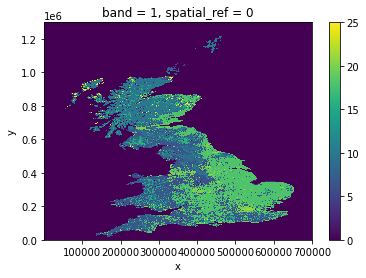

In [28]:
lcm90_1km.plot()

In [23]:
# https://corteva.github.io/rioxarray/stable/getting_started/crs_management.html
lcm90_1km.rio.crs

CRS.from_wkt('PROJCS["OSGB 1936 / British National Grid",GEOGCS["OSGB 1936",DATUM["OSGB_1936",SPHEROID["Airy 1830",6377563.396,299.324964600004,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4277"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.9996012717],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [30]:
lcm90_1km.rio.bounds()

(500.0, -500.0, 700500.0, 1299500.0)

In [29]:
lcm90_1km.rio.resolution()

(1000.0, -1000.0)

In [102]:
lcm90_1km.rio.nodata

In [76]:
woe_minx = 100000
woe_miny = 100000
woe_maxx = 450000
woe_maxy = 450000

In [52]:
# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm90_1km_woe = lcm90_1km.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

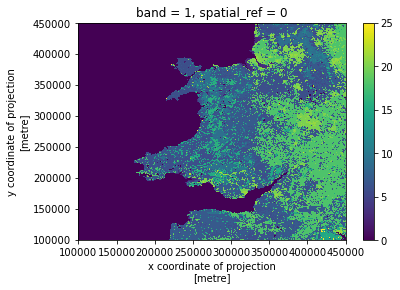

In [53]:
lcm90_1km_woe.plot()

In [77]:
lcm90_1km_woe_slice = lcm90_1km.rio.slice_xy(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

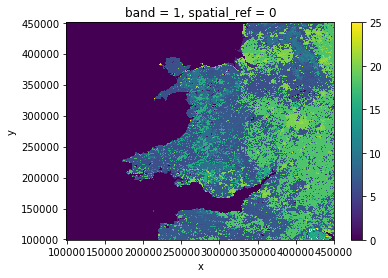

In [78]:
lcm90_1km_woe_slice.plot()

In [85]:
lcm90_25m = rxr.open_rasterio("data/WoE/GI-Areas/lcm-1990-25m_4137016/gb1990lcm25m.tif")

In [86]:
print(type(lcm90_25m))
print(lcm90_25m.rio.crs)
print(lcm90_25m.rio.bounds())
print(lcm90_25m.rio.resolution())
print(lcm90_25m.rio.count)

<class 'xarray.core.dataarray.DataArray'>
EPSG:27700
(0.0, 0.0, 700000.0, 1300000.0)
(25.0, -25.0)
3


In [92]:
lcm90_25m[1].rio.count

1

In [109]:
woe_minx = 325000
woe_miny = 140000
woe_maxx = 380000
woe_maxy = 200000

# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm90_25m_woe = lcm90_25m.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

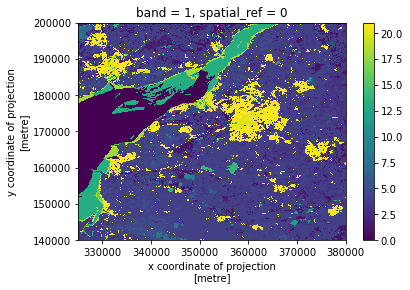

In [110]:
lcm90_25m_woe[0].plot()  #use a more appropriate pallette

In [106]:
lcm90_25m_dom = lcm90_25m[0]

In [111]:
# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm90_25m_dom_woe = lcm90_25m_dom.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

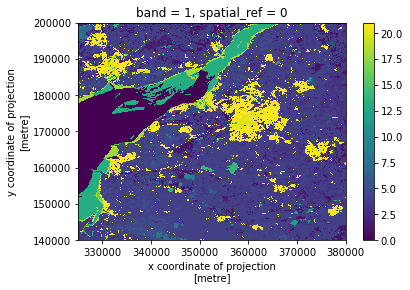

In [112]:
lcm90_25m_dom_woe.plot()

In [103]:
lcm15_25m = rxr.open_rasterio("data/WoE/GI-Areas/lcm-2015-25m_4137018/lcm2015gb25m.tif")
lcm15_25m_dom = lcm15_25m[0]

In [104]:
# https://corteva.github.io/rioxarray/stable/examples/clip_box.html
lcm15_25m_dom_woe = lcm15_25m_dom.rio.clip_box(
    minx=woe_minx,
    miny=woe_miny,
    maxx=woe_maxx,
    maxy=woe_maxy
)

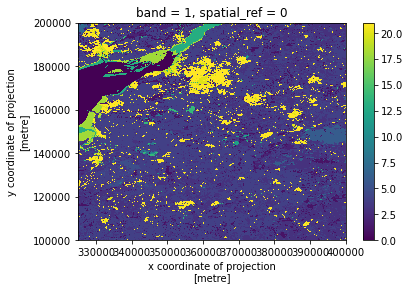

In [105]:
lcm15_25m_dom_woe.plot()

Be aware of data loss

https://corteva.github.io/rioxarray/stable/getting_started/manage_information_loss.html

Writing data

In [114]:
# https://corteva.github.io/rioxarray/stable/rioxarray.html#rioxarray.raster_dataset.RasterDataset.to_raster
lcm90_25m_dom_woe.rio.to_raster("data/WoE/GI-Areas/lcm-1990-25m_4137016/gb1990lcm25m_dom_woe.tif")

Read back in

In [115]:
lcm90_25m_dom_woe2 = rxr.open_rasterio("data/WoE/GI-Areas/lcm-1990-25m_4137016/gb1990lcm25m_dom_woe.tif")

In [116]:
print(type(lcm90_25m))
print(lcm90_25m_dom_woe2.rio.crs)
print(lcm90_25m_dom_woe2.rio.bounds())
print(lcm90_25m_dom_woe2.rio.resolution())
print(lcm90_25m_dom_woe2.rio.count)

<class 'xarray.core.dataarray.DataArray'>
EPSG:27700
(325000.0, 140000.0, 380000.0, 200000.0)
(25.0, -25.0)
1
